In [214]:
!git status

On branch master
Your branch is up-to-date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .ipynb_checkpoints/pendigits-checkpoint.ipynb
	modified:   pendigits.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [217]:
!git add pendigits.ipynb
!git pull origin master 
!git commit -m "Update"
!git push --set-upstream origin master

Merge made by the 'recursive' strategy.
 PythonDataAnalysis.pptx | Bin 0 -> 196043 bytes
 README.md               |  75 +++++++++++++++++++++++++++++++++++++++++++++++-
 2 files changed, 74 insertions(+), 1 deletion(-)
 create mode 100644 PythonDataAnalysis.pptx


From https://github.com/ImadMebrouk/Pendigits
 * branch            master     -> FETCH_HEAD


On branch master
Your branch is ahead of 'origin/master' by 3 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
	modified:   .ipynb_checkpoints/pendigits-checkpoint.ipynb

no changes added to commit
Branch master set up to track remote branch master from origin.


fatal: HttpRequestException encountered.
   Une erreur s'est produite lors de l'envoi de la demande.
To https://github.com/ImadMebrouk/Pendigits.git
   60211e2..dce8849  master -> master


In [78]:
import pandas as pd 
import numpy as np

# 0) Téléchargement des données : Pendigits

In [79]:
df_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", sep=',', header=None)
df_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", sep=',', header=None)


In [80]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [81]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


# Renommage des colonnes

In [82]:
df_test.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [154]:
nouvelles_columns = ["x1", 
                     "y1", 
                     "x2", 
                     "y2", 
                     "x3", 
                     "y3", 
                     "x4", 
                     "y4",
                     "x5",
                     "y5", 
                     "x6",
                     "y6",
                     "x7",
                     "y7", 
                     "x8", 
                     "y8",
                     "target"]

In [155]:
list(zip(nouvelles_columns, df_test.columns))

[('x1', 'x1'),
 ('y1', 'y1'),
 ('x2', 'x2'),
 ('y2', 'y2'),
 ('x3', 'x3'),
 ('y3', 'y3'),
 ('x4', 'x4'),
 ('y4', 'y4'),
 ('x5', 'x5'),
 ('y5', 'y5'),
 ('x6', 'x6'),
 ('y6', 'y6'),
 ('x7', 'x7'),
 ('y7', 'y7'),
 ('x8', 'x8'),
 ('y8', 'y8'),
 ('target', 'output')]

In [156]:
df_test.columns = nouvelles_columns

In [157]:
df_test.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,target
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [158]:

print("train : ")
print(df_train.shape)

print("test : ")
print(df_test.shape)



train : 
(7494, 17)
test : 
(3498, 17)


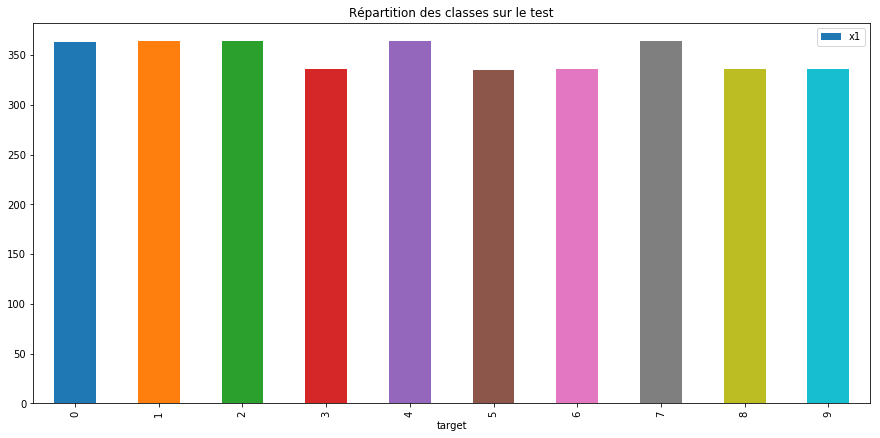

In [159]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
title= 'Répartition des classes sur le test'
df_test.groupby(['target']).count()['x1'].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

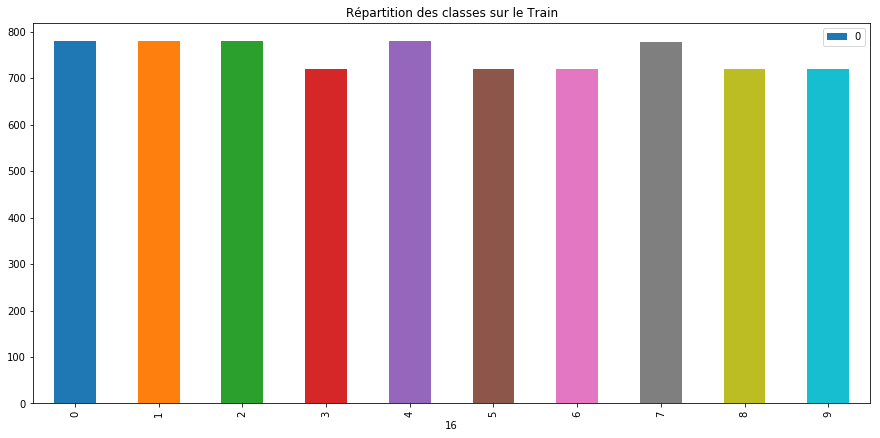

In [160]:

fig, ax = plt.subplots(figsize=(15,7))


title= 'Répartition des classes sur le Train'
df_train.groupby([16]).count()[0].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()           

In [89]:
test = df_test.head()

88

In [118]:


xsList = []
ysList =[]

In [119]:
xs =[]
ys =[]

i=0
while( i < 16):
    xs.append(test.iloc[1][i])
    ys.append(test.iloc[1][i+1])
    i = i+2
    
    
xsList.append(xs)
ysList.append(ys)

In [120]:
xs =[]
ys =[]

i=0
while( i < 16):
    xs.append(test.iloc[2][i])
    ys.append(test.iloc[2][i+1])
    i = i+2
    
    
xsList.append(xs)
ysList.append(ys)

In [121]:
xs =[]
ys =[]

i=0
while( i < 16):
    xs.append(test.iloc[3][i])
    ys.append(test.iloc[3][i+1])
    i = i+2
    
    
xsList.append(xs)
ysList.append(ys)

In [122]:
xs =[]
ys =[]

i=0
while( i < 16):
    xs.append(test.iloc[4][i])
    ys.append(test.iloc[4][i+1])
    i = i+2
    
    
xsList.append(xs)
ysList.append(ys)

In [94]:
import matplotlib.pyplot as plt

In [123]:
xsList

[[80, 18, 60, 100, 42, 0, 42, 56],
 [0, 9, 20, 7, 20, 70, 100, 18],
 [95, 71, 27, 77, 100, 93, 56, 0],
 [68, 6, 47, 87, 85, 100, 75, 0]]

Exemple des output


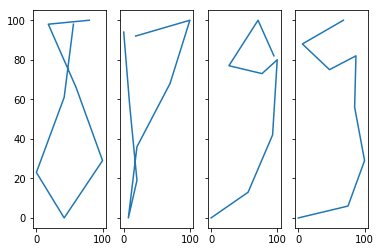

In [145]:
print("Exemple des targets")

f, (ax1, ax2,ax3, ax4) = plt.subplots(1, 4, sharey=True)
ax1.plot(xsList[0], ysList[0])

ax2.plot(xsList[1], ysList[1])

ax3.plot(xsList[2], ysList[2])

ax4.plot(xsList[3], ysList[3])



# Modélisation 


In [97]:
from sklearn import cross_validation



In [98]:
X_train = df_train[df_train.columns[:16]]

y_train =df_train[df_train.columns[16]]

X_test = df_test[df_test.columns[:16]]

y_test =df_test[df_test.columns[16]]



# Test algorithmes 

### 1 - Support Vector Machine 

In [168]:
from sklearn import svm
algorithme = svm.SVC()
algorithme.get_params()

performances = {}


In [180]:
from sklearn import cross_validation
result = cross_validation.cross_val_score(algorithme, X_train, y_train, n_jobs=-1)
result 
performances["SVM-CrossValid"] = [result[0]]

Precision très faible ..

#### Avec un Grid Search 

In [181]:
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_.score(X_test, y_test))

performances["SVM-GridSearch"]  = [grid.best_score_]

0.49666399786495863 0.4428244711263579


On observe une meilleure précision mais encore relativement basse.. 

### 2 - XGBoost Classifier

In [104]:
!pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
from xgboost import XGBClassifier

algo = XGBClassifier()

In [183]:
xgb_cross = cross_validation.cross_val_score(algo, X_train, y_train, n_jobs=-1)
xgb_cross

performances["XGBoost-crossValid"]  = [xgb_cross[0]]

In [184]:

parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = grid_search.GridSearchCV(algo, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

performances["XGBoost-GridSearch"]  = [grid.best_score_]

0.984520950093408 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


Une bien meilleure précision : 98,4 %  !

### 3 - K-nn

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Comparaison de la valeur K

In [239]:
error = []
k_min = 1
k_max = 20

# Calculating error for K values between 1 and 20
for i in range(k_min, k_max):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Meilleur K :  3 , précision :  0.978


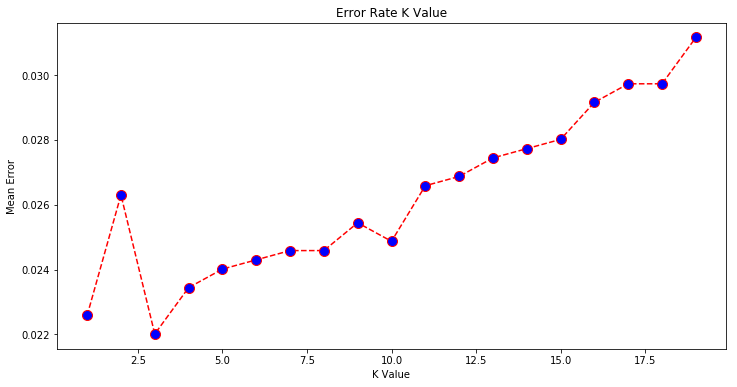

In [240]:
plt.figure(figsize=(12, 6))  
plt.plot(range(k_min, k_max), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

best_k = np.argmin(error) + 1
print("Meilleur K : ", best_k, ", précision : ", 1 - round(min(error), 3))



#### Entrainement avec le meilleur K

In [241]:
knn = KNeighborsClassifier(n_neighbors=best_k)  
modele = knn.fit(X_train, y_train)

#### Prédiction et résultat 

In [242]:
knn_perf = modele.score(X_test,y_test)
print(knn_perf
performances["Knn"]  = [knn_perf]

In [218]:
y_pred = knn.predict(X_test)

array([8, 8, 8, ..., 0, 0, 4], dtype=int64)

In [220]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))


[[354   0   0   0   0   0   5   0   3   1]
 [  0 350  11   0   1   0   0   2   0   0]
 [  0   2 362   0   0   0   0   0   0   0]
 [  0   1   0 333   0   0   0   0   0   2]
 [  0   0   0   0 354  10   0   0   0   0]
 [  0   0   0   5   0 328   0   0   0   2]
 [  0   0   0   0   0   0 336   0   0   0]
 [  0  10   1   0   0   0   1 351   1   0]
 [  1   0   0   0   0   1   0   0 334   0]
 [  0   3   0   7   1   1   0   4   1 319]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       363
          1       0.96      0.96      0.96       364
          2       0.97      0.99      0.98       364
          3       0.97      0.99      0.98       336
          4       0.99      0.97      0.98       364
          5       0.96      0.98      0.97       335
          6       0.98      1.00      0.99       336
          7       0.98      0.96      0.97       364
          8       0.99      0.99      0.99       336
          9       0.98      0.95      

ValueError: Expected 2D array, got 1D array instead:
array=[8 8 8 ... 0 0 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Random Forest

#### Comparaison du parametre n_estimators

In [146]:
from sklearn.ensemble import RandomForestClassifier

error = []
n_min = 1
n_max = 100

for i in range(n_min, n_max):  
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Meilleur N :  72 , précision :  0.969


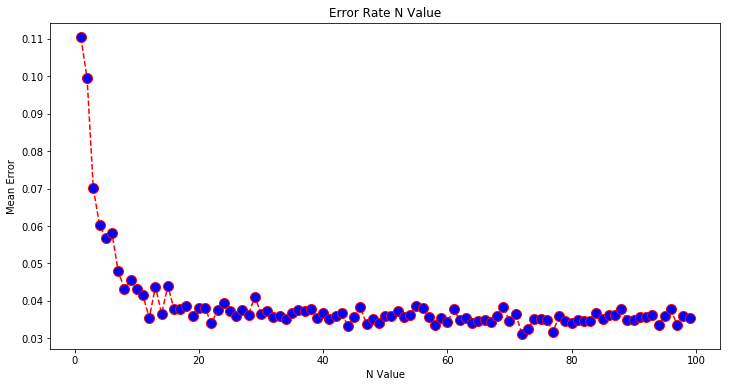

In [147]:
plt.figure(figsize=(12, 6))  
plt.plot(range(n_min, n_max), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate N Value')  
plt.xlabel('N Value')  
plt.ylabel('Mean Error')  

best_n = np.argmin(error) + 1
print("Meilleur N : ", best_n, ", précision : ", 1 - round(min(error), 3))

#### Entrainement avec le meilleur n 

In [148]:
rf = RandomForestClassifier(n_estimators=best_n)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Prédiction et résultat

In [235]:
rf.score(X_test,y_test)

0.9642652944539737

In [149]:
y_pred = rf.predict(X_test)

In [177]:
print(round(accuracy_score(y_test, y_pred), 3))

performances["RandomForest"]  = [round(accuracy_score(y_test, y_pred), 3)]

0.964


# Visualisation des perfomances 

In [230]:
performances

{'SVM-CrossValid': [0.136],
 'SVM-GridSearch': [0.49666399786495863],
 'XGBoost-crossValid': [0.9816],
 'XGBoost-GridSearch': [0.984520950093408],
 'Knn': [0.978],
 'RandomForest': [0.964]}

In [201]:
df = pd.DataFrame(performances).T

In [202]:
col_name = "performance"
df.columns = [col_name]

In [203]:
df = df.sort_values(col_name)

In [204]:
df

,performance
SVM-CrossValid,0.136000
SVM-GridSearch,0.496664
RandomForest,0.964000
Knn,0.980000
XGBoost-crossValid,0.981600
XGBoost-GridSearch,0.984521


In [192]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [193]:
df = df.drop("gains", axis=1)

In [194]:
df

,performance
SVM-CrossValid,0.136000
SVM-GridSearch,0.496664
RandomForest,0.964000
Knn,0.980000
XGBoost-crossValid,0.981600
XGBoost-GridSearch,0.984521


In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

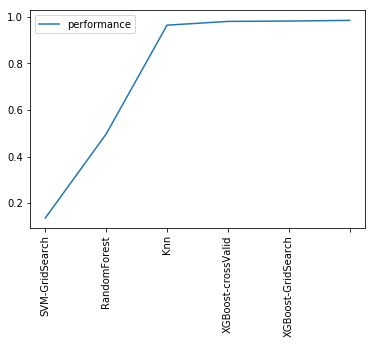

In [207]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

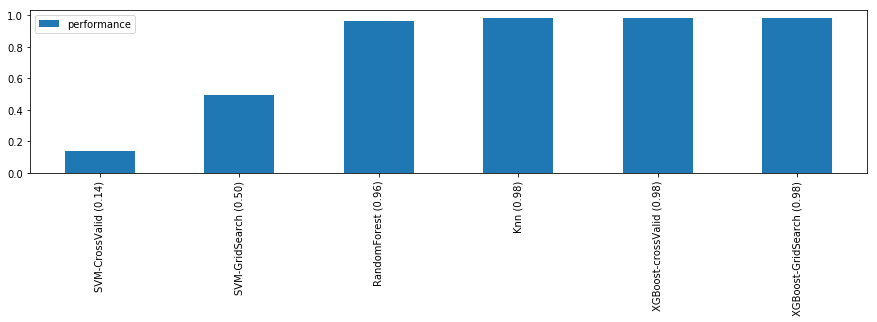

In [209]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(15,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

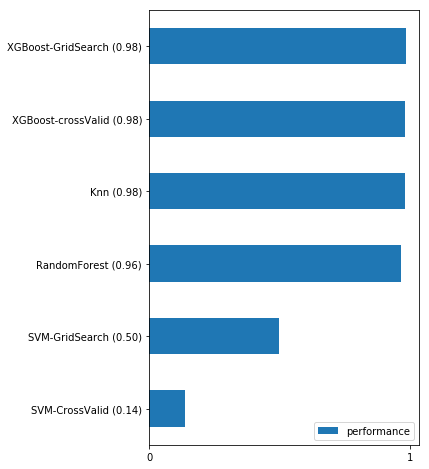

In [208]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass